1.	What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class. 

Using ONE of the following sources, complete the questions for only that source. 

Credit approval: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone - this one is a bit harder since it’s not binary like the others, but if you really want to master these concepts, you should pick this one. Use RMSE as a performance metric if you do this as regression. You should target a value of under 3.

Note: at least one of your models should have the most relevant performance metric above .90 . All performance metrics should be above .75 . You will partially be graded on model performance.

2.	Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 

3.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

4.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

5.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

6.	Which model performed best? What is your performance metric? Why? 


In [ ]:
# Inductive Reasoning:


In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#  Import SK-Learn Library
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score , classification_report
from sklearn.preprocessing import StandardScaler

In [170]:
data = np.genfromtxt(r'C:\Users\rsagu\Downloads\australian.dat',
                     names='A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, A15',
                     dtype=None,
                     delimiter=' ')
dat_df = pd.DataFrame(data) 
dat_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [159]:
X = dat_df.iloc[:, :-1].values
y = dat_df.iloc[:, -1].values

In [160]:
# One Hot Encoding the columns: 3, 4, 5, 11
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
        transformers = [('one_hot_encoder', OneHotEncoder(categories = 'auto'),[3, 4, 5, 11])],
        remainder = 'passthrough')

X = ct.fit_transform(X)

# Scaling - Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [161]:
# Splitting dataset into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [112]:
# Import DecisionTreeClassifier, accuracy_score and mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeClassifier(criterion='entropy', max_features=5, min_samples_leaf=6, random_state=7, max_depth = 5)
# training classifier
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set RMSE of rf: 0.37
Test set accuracy: 0.86


In [129]:
# Import necessary modules
from sklearn import tree
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [4, None],
              "max_features": randint(1, 10),
              "min_samples_leaf": randint(1, 10),
              "criterion": ["gini", "entropy"],
             "splitter": ["best", "random"]}

# Instantiate a Decision Tree classifier: tree
tree = tree.DecisionTreeClassifier(random_state=42)

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 4, 'splitter': 'best'}
Best score is 0.8496642096642096


In [130]:
# Import tree
from sklearn import tree
best_model = tree.DecisionTreeClassifier(criterion ='entropy', max_depth =5, max_features=7,
                                        min_samples_leaf=5, splitter='best', random_state = 42)

In [131]:
# test the model performance
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        87
           1       0.75      0.88      0.81        51

    accuracy                           0.85       138
   macro avg       0.84      0.85      0.84       138
weighted avg       0.86      0.85      0.85       138



In [26]:
# from sklearn.model_selection import GridSearchCV
# params = {'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],'max_features':[2,4, 6, 8]}
# CV= GridSearchCV(dt, param_grid = params, scoring = 'accuracy', cv = 10)
# CV.fit(X_train, y_train)

# # best parameters and also the best score
# print("Tuned Linear Regression Parameters: {}".format(CV.best_params_))
# print("Best score is {}".format(CV.best_score_))

In [165]:
# Building the Decision Tree Classifier model
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 170, random_state = 0)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print("\nMean of the Accuracies after cross-validation: ", accuracies.mean())
print("\nStandard Deviation within the accuracies: ", accuracies.std())

print('\nAccuracy: ', accuracy)


Mean of the Accuracies after cross-validation:  0.8806168831168831

Standard Deviation within the accuracies:  0.049471837275569974

Accuracy:  0.8985507246376812


In [132]:

# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

# define the model
model = RandomForestClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.903 (0.024)


In [166]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=170, random_state = 0)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8985507246376812

In [167]:
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        87
           1       0.91      0.80      0.85        51

    accuracy                           0.90       138
   macro avg       0.90      0.88      0.89       138
weighted avg       0.90      0.90      0.90       138



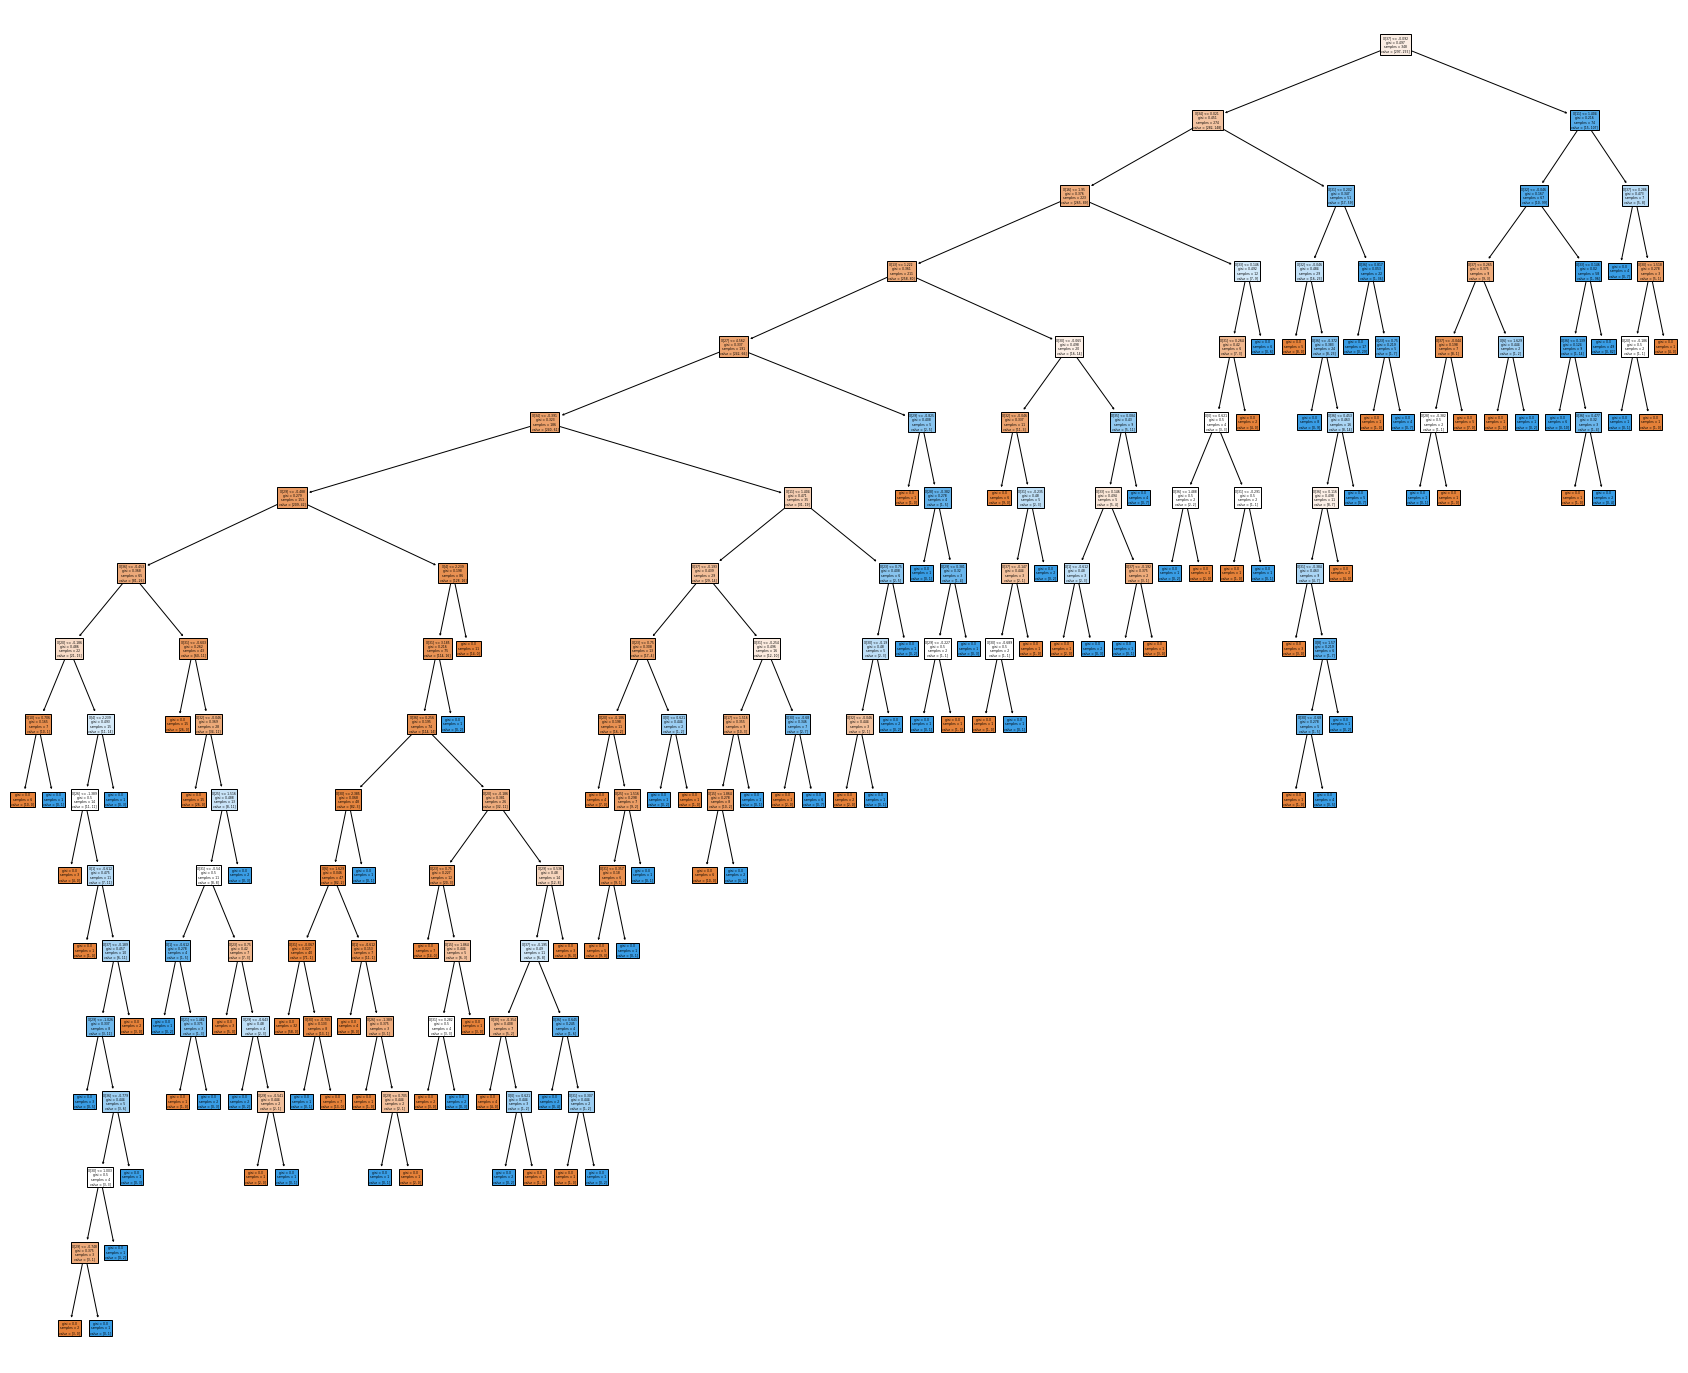

In [168]:
fig = plt.figure(figsize=(30,25))

fig = tree.plot_tree(tree_10,
                    filled=True)

plt.savefig("tree10.svg", dpi=200)
plt.show()

In [133]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# # Compute test set accuracy  
# acc = accuracy_score(y_test, y_pred)
# print("Test set accuracy: {:.2f}".format(acc))

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Training Accuracy:', round(rf.score(X_train, y_train),4))
print('Testing Accuracy: ', round(rf.score(X_test, y_test),4))

Test set RMSE of rf: 0.31
Training Accuracy: 0.9445
Testing Accuracy:  0.5781


In [173]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))
print('Training Accuracy:', round(gb.score(X_train, y_train),4))
print('Testing Accuracy: ', round(gb.score(X_test, y_test),4))

Test set RMSE of gb: 0.336
Training Accuracy: 0.98
Testing Accuracy:  0.5152


In [174]:
#XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:03:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        87
           1       0.82      0.82      0.82        51

    accuracy                           0.87       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.87      0.87      0.87       138



In [176]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8600405679513184


Text(0, 0.5, 'True Positive Rate')

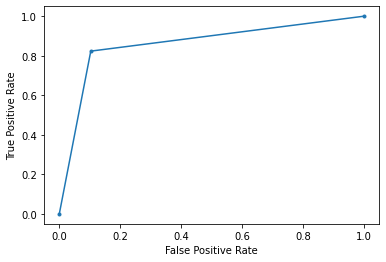

In [179]:
plt.plot(fpr, tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")